In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:
temperature_data = pd.read_csv('C:/Users/asus/Downloads/Machine Test Tranzmeo/temperature.csv')


In [73]:
print(temperature_data.head())
print(temperature_data.info())

            ID        Date Element  Data_Value
0  USW00094889  2014-11-12    TMAX          22
1  USC00208972  2009-04-29    TMIN          56
2  USC00200032  2008-05-26    TMAX         278
3  USC00205563  2005-11-11    TMAX         139
4  USC00200230  2014-02-27    TMAX        -106
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          165085 non-null  object
 1   Date        165085 non-null  object
 2   Element     165085 non-null  object
 3   Data_Value  165085 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB
None


In [21]:
temperature_data['Date'] = pd.to_datetime(temperature_data['Date'])

In [23]:
# Extract year, month, and day
temperature_data['Year'] = temperature_data['Date'].dt.year
temperature_data['Month'] = temperature_data['Date'].dt.month
temperature_data['Day'] = temperature_data['Date'].dt.day

In [ ]:
# Remove February 29 (leap years)
temperature_data = temperature_data[(temperature_data['Month'] != 2) | (temperature_data['Day'] != 29)]
#Keep rows where the Month is not February (Month != 2).OR (|) keep rows where the Day is not 29 (Day != 29)

In [29]:
# Convert Data_Value from tenths of degrees Celsius to actual degrees
temperature_data['Data_Value'] = temperature_data['Data_Value'] / 10.0

In [31]:
# Separate records for Maximum (TMAX) and Minimum (TMIN) temperatures
tmax_data = temperature_data[temperature_data['Element'] == 'TMAX']
tmin_data = temperature_data[temperature_data['Element'] == 'TMIN']

In [33]:
# Get record high and low temperatures from 2005 to 2014
data_2005_2014 = temperature_data[(temperature_data['Year'] >= 2005) & (temperature_data['Year'] <= 2014)]
record_highs = data_2005_2014.groupby(['Month', 'Day'])['Data_Value'].max()
record_lows = data_2005_2014.groupby(['Month', 'Day'])['Data_Value'].min()

In [35]:
# Get 2015 data to check if any new record temperatures were set
data_2015 = temperature_data[temperature_data['Year'] == 2015]

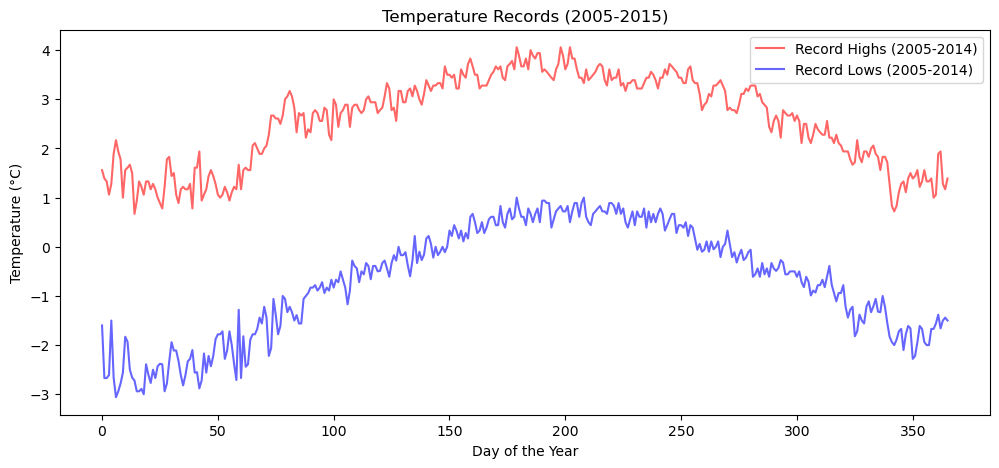

In [77]:


# Plot temperature trends
plt.figure(figsize=(12, 5))
plt.plot(record_highs.values, label='Record Highs (2005-2014)', color='red', alpha=0.6)
plt.plot(record_lows.values, label='Record Lows (2005-2014)', color='blue', alpha=0.6)




plt.xlabel('Day of the Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.title('Temperature Records (2005-2015)')
plt.show()
